<a href="https://colab.research.google.com/github/artms-18/ML-Projects/blob/main/Mika_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

In [3]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mikashaw","key":"5ea1167847d0f4828837c42bb91725e5"}'}

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d saurabhshahane/public-perception-of-ai

  0% 0.00/1.84M [00:00<?, ?B/s]
100% 1.84M/1.84M [00:00<00:00, 62.2MB/s]


In [7]:
!ls

kaggle.json  public-perception-of-ai.zip  sample_data


In [26]:
# import pandas as pd
#data2 = pd.read_csv('/content/us-consumer-finance-complaints.zip', compression='zip', header=0, sep=',', quotechar='"

import pandas as pd

data = pd.read_csv("/content/public-perception-of-ai.zip", compression = 'zip', header = 0, sep = ',', quotechar = '"')

In [48]:
import zipfile
zip_file = zipfile.ZipFile("/content/public-perception-of-ai.zip", 'r')
data = pd.read_csv(zip_file.open("robot-ai-all-public.csv"))
zip_file.close()
data.head()


,Article ID,Article Date,Paragraph number,NYT section,Paragraph,Title,WorkTimeInSeconds,AI Mood,AI Relevance,Fiction,Controling AI (negative),Cyborg (negative),Ethics (negative),Military (negative),Progress (negative),Singularity (negative),Work (negative),Other (negative),Cyborg (positive),Decisions (positive),Education (positive),Entertain (positive),Healthcare (positive),Singularity (positive),Transportation (positive),Work (positive),Other (positive)
0,4fd1cbc98eb7c8105d701286,1996-10-06 00:00:00 UTC,18,New York and Region,"Thus, next weekend will feature the robot who ...",LONG ISLAND JOURNAL,1472,4,5,0,0,0,0,0,0,0,0,{},0,0,0,0,0,0,0,0,{}
1,4fd1cbc98eb7c8105d701286,1996-10-06 00:00:00 UTC,18,New York and Region,"Thus, next weekend will feature the robot who ...",LONG ISLAND JOURNAL,49,4,5,0,0,0,0,0,0,0,0,{},0,0,0,0,0,0,0,0,{}
2,4fd1cbc98eb7c8105d701286,1996-10-06 00:00:00 UTC,18,New York and Region,"Thus, next weekend will feature the robot who ...",LONG ISLAND JOURNAL,66,5,5,0,0,0,0,0,0,0,0,{},0,0,0,1,0,0,0,0,{}
3,54b0793b7988100e21965770,2006-07-31 00:00:00 UTC,16,Technology,That phrase was coined in the 1970۪s by Masahi...,Camera System Creates Sophisticated 3-D Effects,3053,3,4,0,0,0,0,0,0,0,0,{},0,0,0,0,0,0,0,0,{}
4,54b0793b7988100e21965770,2006-07-31 00:00:00 UTC,16,Technology,That phrase was coined in the 1970۪s by Masahi...,Camera System Creates Sophisticated 3-D Effects,25,3,4,0,0,0,0,0,0,0,0,{},0,0,0,0,0,0,0,0,{}


In [49]:
#get relevant columns

cols = data.columns

data = data.drop(['NYT section', 'Paragraph number', 'Title', 'WorkTimeInSeconds'], axis = 1)


In [50]:
data['Article Date'] = data['Article Date'].str.split('(\s+)', expand = True)[0]

In [51]:
data.head()

,Article ID,Article Date,Paragraph,AI Mood,AI Relevance,Fiction,Controling AI (negative),Cyborg (negative),Ethics (negative),Military (negative),Progress (negative),Singularity (negative),Work (negative),Other (negative),Cyborg (positive),Decisions (positive),Education (positive),Entertain (positive),Healthcare (positive),Singularity (positive),Transportation (positive),Work (positive),Other (positive)
0,4fd1cbc98eb7c8105d701286,1996-10-06,"Thus, next weekend will feature the robot who ...",4,5,0,0,0,0,0,0,0,0,{},0,0,0,0,0,0,0,0,{}
1,4fd1cbc98eb7c8105d701286,1996-10-06,"Thus, next weekend will feature the robot who ...",4,5,0,0,0,0,0,0,0,0,{},0,0,0,0,0,0,0,0,{}
2,4fd1cbc98eb7c8105d701286,1996-10-06,"Thus, next weekend will feature the robot who ...",5,5,0,0,0,0,0,0,0,0,{},0,0,0,1,0,0,0,0,{}
3,54b0793b7988100e21965770,2006-07-31,That phrase was coined in the 1970۪s by Masahi...,3,4,0,0,0,0,0,0,0,0,{},0,0,0,0,0,0,0,0,{}
4,54b0793b7988100e21965770,2006-07-31,That phrase was coined in the 1970۪s by Masahi...,3,4,0,0,0,0,0,0,0,0,{},0,0,0,0,0,0,0,0,{}


In [52]:
data['AI Mood'].value_counts()

3    10947
4     2717
5     1835
2     1313
1      261
Name: AI Mood, dtype: int64

This is an unbalanced dataset (we will need to remember this for later), additionally for this project we will use only the 'AI Mood' column as the 'target' for our machine learning or deep learning model.

In [53]:
#let's drop the rest of the unnecessary columns

cols = data.columns.to_list()

data = data.drop(columns = cols[4:], axis = 1)

In [54]:
data.head()

,Article ID,Article Date,Paragraph,AI Mood
0,4fd1cbc98eb7c8105d701286,1996-10-06,"Thus, next weekend will feature the robot who ...",4
1,4fd1cbc98eb7c8105d701286,1996-10-06,"Thus, next weekend will feature the robot who ...",4
2,4fd1cbc98eb7c8105d701286,1996-10-06,"Thus, next weekend will feature the robot who ...",5
3,54b0793b7988100e21965770,2006-07-31,That phrase was coined in the 1970۪s by Masahi...,3
4,54b0793b7988100e21965770,2006-07-31,That phrase was coined in the 1970۪s by Masahi...,3


In [55]:
#we also probably do not need the Article ID column

data = data.drop(columns = ['Article ID'], axis = 1)

data.dtypes



Article Date    object
Paragraph       object
AI Mood          int64
dtype: object

For visualization purposes, we will aggregate AI Mood and get the average when days are the same

In [67]:
#renameing cols to make them easier

data = data.rename(columns = {'AI Mood': 'ai_mood', 'Article Date': 'article_date'})

In [68]:
data.head()

,article_date,Paragraph,ai_mood
0,1996-10-06,"Thus, next weekend will feature the robot who ...",4
1,1996-10-06,"Thus, next weekend will feature the robot who ...",4
2,1996-10-06,"Thus, next weekend will feature the robot who ...",5
3,2006-07-31,That phrase was coined in the 1970۪s by Masahi...,3
4,2006-07-31,That phrase was coined in the 1970۪s by Masahi...,3


In [69]:
data_viz = data.groupby('article_date').ai_mood.mean().reset_index()

In [70]:
data_viz.head()

,article_date,ai_mood
0,18,3.000000
1,1986-01-03,3.000000
2,1986-01-05,4.000000
3,1986-01-16,3.000000
4,1986-01-26,3.166667


## Visualizing the data

In [17]:
import matplotlib.pyplot as plt

In [18]:
# do some of them happen on the same day?

data['Article Date'].value_counts()

unique_dates = data['Article Date'].nunique()

unique_dates

1625

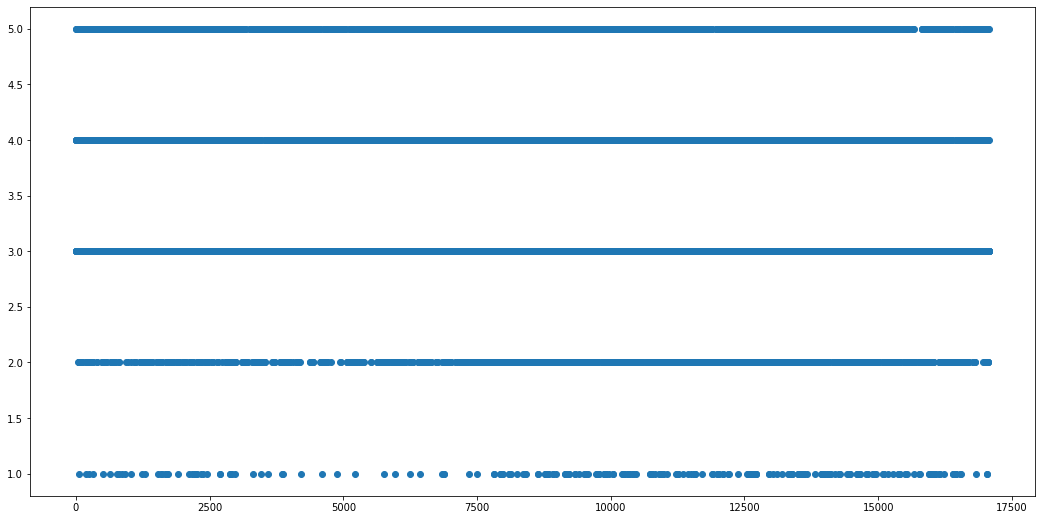

In [21]:
%matplotlib inline

plt.figure(figsize = (18,9))
plt.scatter(range(len(data['AI Mood'])), data['AI Mood'])


In [82]:
#from autoviz.AutoViz_Class import AutoViz_Class

#AV = AutoViz_Class()

#df = AV.AutoViz("robot-ai-all-public.csv", depVar = 'AI Mood')

File encoding decoder utf-8 does not work for this file
File encoding decoder iso-8859-11 does not work for this file
File encoding decoder cpl252 does not work for this file
File encoding decoder latin1 does not work for this file
None of the decoders work...
Not able to read or load file. Please check your inputs and try again...


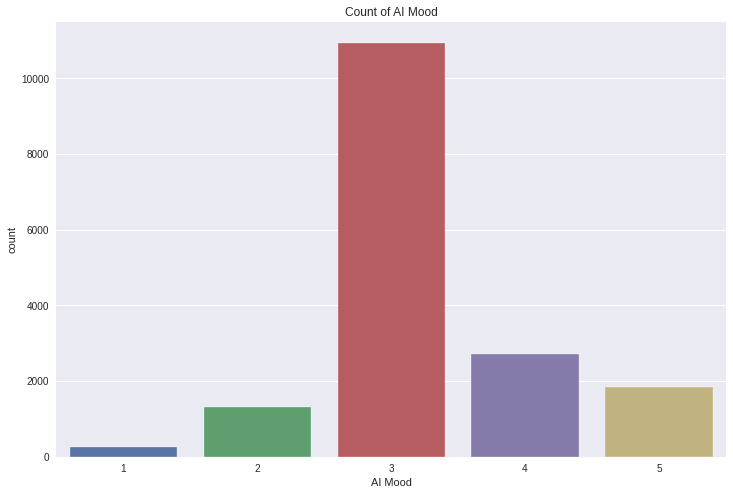

In [86]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (12, 8))
sns.countplot(data['AI Mood'])
ax.set_title("Count of AI Mood")
plt.show()

Based on these counts, we can determine that over all the years, AI sentiment has remained relatively neutral, with more poeple being positive than negative

Text(0, 0.5, 'Mood')

<Figure size 432x288 with 0 Axes>

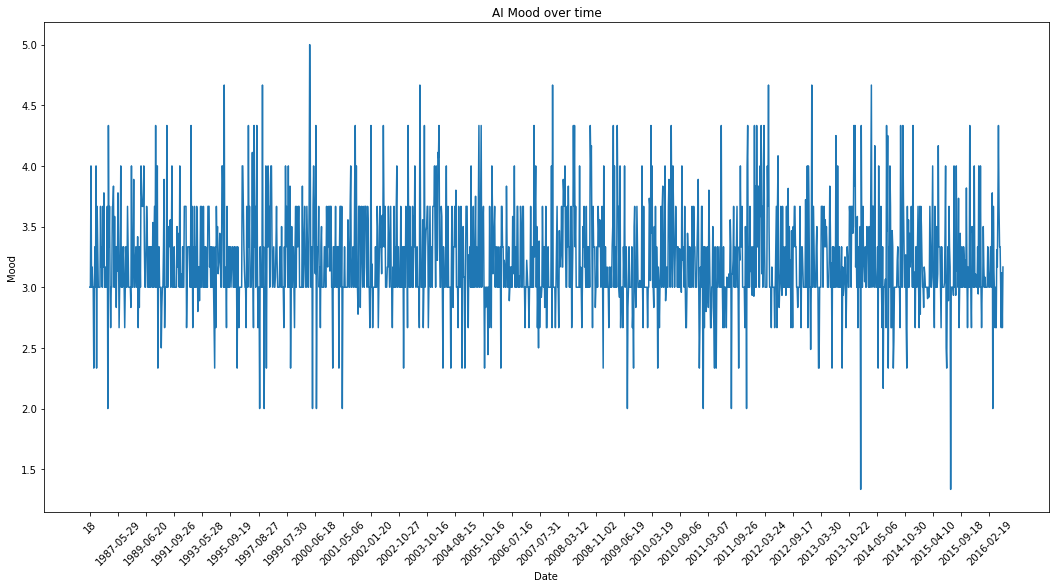

In [80]:
plt.clf()

plt.figure(figsize = (18,9))
plt.plot(data_viz['ai_mood'])
plt.xticks(range(0, data_viz.shape[0],50), data_viz['article_date'].loc[::50], rotation = 45)
plt.title("AI Mood over time")
plt.xlabel("Date")
plt.ylabel("Mood")